In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind
from scipy import sparse, stats

grid_search_dir = '.'
datadir = '.'

datadir = '/storage/groups/ml01/workspace/anna.schaar/ncem/data/'
grid_search_dir = '/storage/groups/ml01/workspace/anna.schaar/ncem/grid_searches/'

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "220128_DECONVOLUTION_BASELINE_PATIENT_cell2location_lymphnode_hvg",
        "220128c_DECONVOLUTION_PATIENT_cell2location_lymphnode_hvg",
    ],
    lateral_resolution=1.
)
gs_linear.load_gs()

220128_DECONVOLUTION_BASELINE_PATIENT_cell2location_lymphnode_hvg: loaded 1 runs with 3-fold cross validation
220128c_DECONVOLUTION_PATIENT_cell2location_lymphnode_hvg: loaded 1 runs with 3-fold cross validation


220128_deconvolution_baseline_patient_cell2location_lymphnode_hvg_adam_lr1_bsS_md0_ri0_n100_fsstandard_l21_l11
subset was empty, available values for model are ['DECONVOLUTION_BASELINE_PATIENT_cell2location_lymphnode'], given was ['DECONVOLUTION_PATIENT_cell2location_lymphnode']
None
subset was empty, available values for model are ['DECONVOLUTION_PATIENT_cell2location_lymphnode'], given was ['DECONVOLUTION_BASELINE_PATIENT_cell2location_lymphnode']
None
220128c_deconvolution_patient_cell2location_lymphnode_hvg_adam_lr1_bsS_md0_ri1_n10_fsstandard_l21_l11


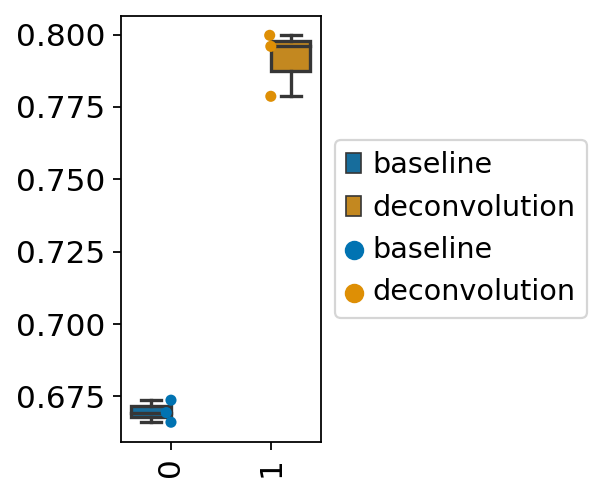

In [4]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    param_hue="model",
    graph_model_class='ed_ncem',
    baseline_model_class='ed',
    rename_levels = [
        ("model", {
            "DECONVOLUTION_PATIENT_cell2location_lymphnode": "deconvolution",
            "DECONVOLUTION_BASELINE_PATIENT_cell2location_lymphnode": "baseline",
        })
    ],
    figsize=(2, 3.5),
)

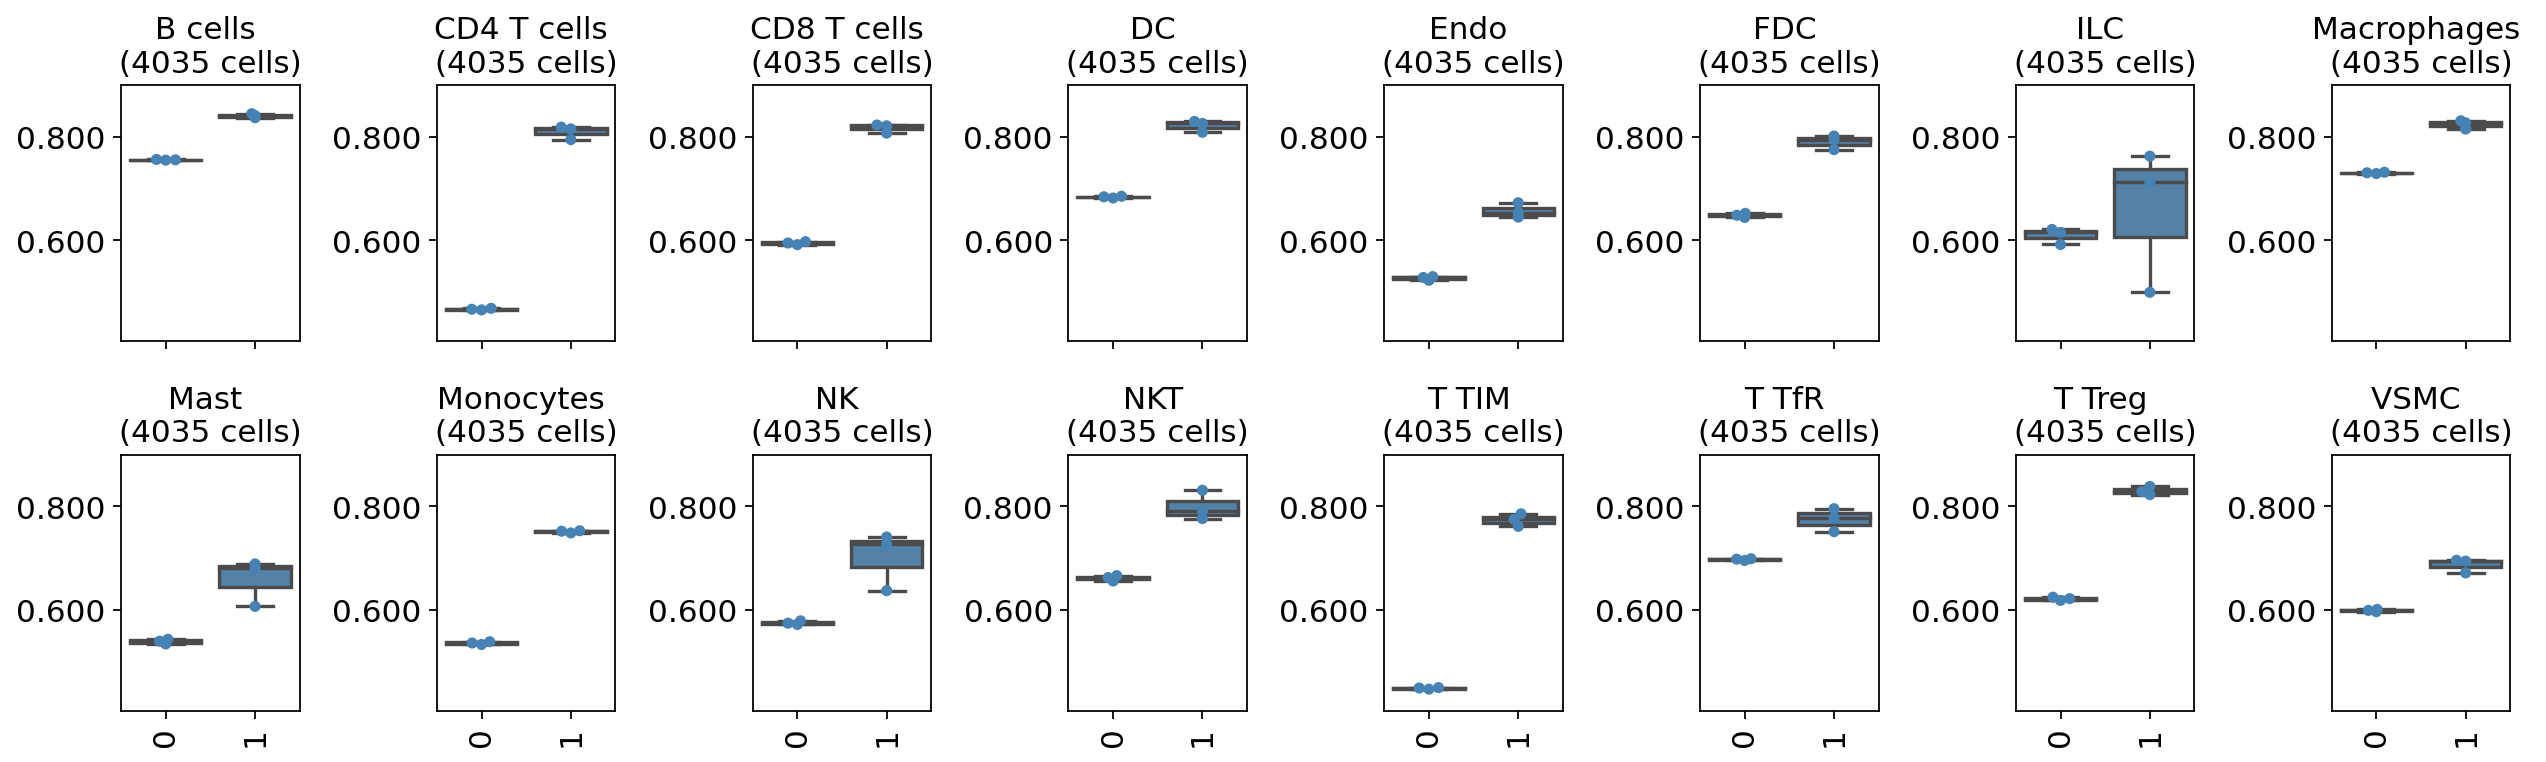

In [5]:
gs_linear.load_target_cell_evaluation()
plt.rcParams['axes.grid'] = False
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    yaxis_limit=(0.405, .90),
    ncols=8,
    panelsize=(2.0, 2.5),
)